# Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import math

$ S_{w,b}(x) = \frac{1}{1 + e^{-(w*x + b)}}$

In [2]:
def sigmoid(x,w,b):
    return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(1,0.5,0)

0.6224593312018546

Linspace creates equally spaced numbers in the given intervals. 

In [4]:
w = -0.9
b = 0.1
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

Both X and Y are arrays.

In [5]:
type(X)

numpy.ndarray

In [6]:
type(Y)

numpy.ndarray

In [7]:
X.shape

(100,)

In [8]:
Y.shape

(100,)

Plotting X against Y

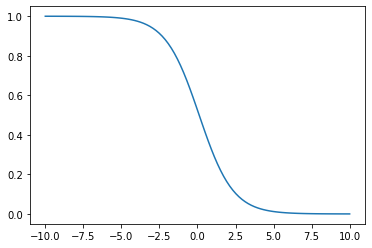

In [9]:
plt.plot(X,Y)
plt.show()

Checking how sigmoid function varies for different values of w and B

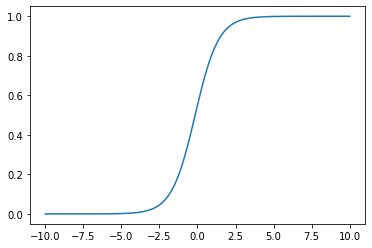

In [10]:
w = 1.3  #@param {type: "slider", min: -10, max: 10, step : 0.1}
b = 0.2   #@param {type: "slider", min: -10, max: 10, step : 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)
plt.plot(X,Y)
plt.show()

w controls the rate of fall of the function
b controls the main region with respect to 0

$ S_{w_1,w_2}(x_1,x_2) = \frac{1}{1 +e^{-(w_1x_1 + w_2x_2+b)}}$

In [11]:
def sigmoid_2d(x1, x2, w1, w2, b):
    return 1/(1+np.exp(-(w1*x1+ w2*x2 + b)))

In [12]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

3D Plotting in MatPlotLib

In [13]:
X1 = np.linspace(-10,10,100)
X2 = np.linspace(-10,10,100)

XX1, XX2 = np.meshgrid(X1, X2)

In [14]:
print(X1.shape, XX1.shape, X2.shape, XX2.shape)

(100,) (100, 100) (100,) (100, 100)


In [15]:
w1 = -1
w2 = 2
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

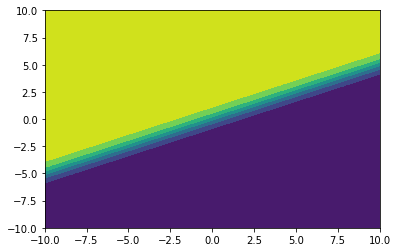

In [16]:
plt.contourf(XX1, XX2, Y)
plt.show()

Giving our own colours for Contour Plot.
Given from Min to Max(in this example from Red is Min and Green in Max)

In [17]:
import matplotlib.colors
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

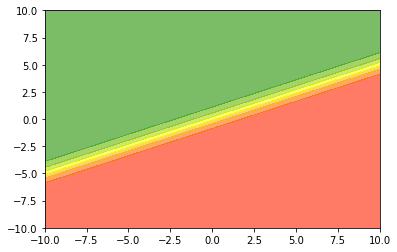

In [18]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

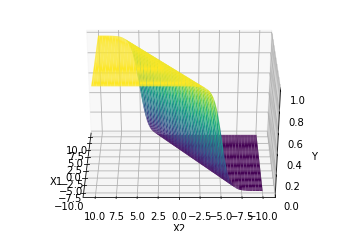

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

ax.view_init(30, 180)

# Compute Loss for the Dataset

In [20]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10 
Y = sigmoid(X, w_unknown, b_unknown)

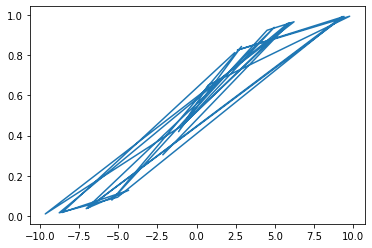

In [21]:
plt.plot(X, Y)
plt.show()

In the above, it was plotting the points but since the points were random it was connecting the points. So, we use scatter plots.

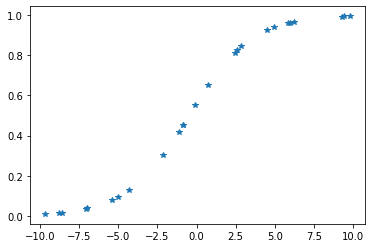

In [22]:
plt.plot(X, Y, '*')
plt.show()

In [23]:
def calculate_loss(X,Y, w_est, b_est):
    loss = 0
    for x,y in zip(X,Y):
        loss += (y-sigmoid(x,w_est, b_est))**2
    return loss

In [24]:
W = np.linspace(0,2,101)
B = np.linspace(-1,1,102)

WW, BB = np.meshgrid(W,B)
Loss = np.zeros(WW.shape)

In [25]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
        Loss[i][j] = calculate_loss(X, Y, WW[i,j], BB[i,j])

3D plotting of the Loss

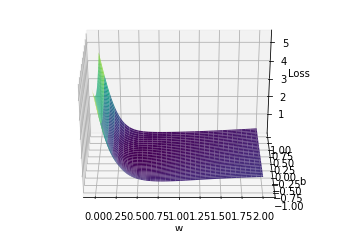

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [27]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])
print(i,j)

63 25


In [28]:
print(WW[i,j], BB[i,j])

0.5 0.24752475247524752


# Class for Sigmoid Neuron

In [29]:
class SigmoidNeuron:
    def __init__(self):
        self.w = None
        self.b = None

    def perceptron(self, x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self, x):
        return 1.0/ (1.0 + np.exp(-x))

    def grad_w(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * x

    def grad_b(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) 

    def fit(self, X , Y ,epochs = 1, learning_rate = 1, initialise = True, display_loss= False):
        
        if initialise:
            self.w = np.random.randn(1, X.shape[1] ) #This is a vector with 1 row and X.shape columns 
            #As it should contains weights for each column in 
            self.b = 0 #Scalar value

        if display_loss:
            loss = {}

        for i in tqdm_notebook(range(epochs), total = epochs, unit = 'Epochs'):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            
            self.w -= learning_rate*dw
            self.b -= learning_rate*db

            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y,Y_pred)

        if display_loss:
            plt.plot(list(loss.values()))
            plt.xlabel('Epochs')
            plt.ylabel('Cross Entropy')
            plt.show()
    
    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

# Fit for Toy Data

In [30]:
X = np.asarray([[2.5,2.5], [4,-1], [1,-4], [-3,1.25], [-2,-4], [1,5]])
Y = [1,1,1,0,0,0]

In [31]:
sn = SigmoidNeuron()

In [32]:
sn.fit(X,Y,1,0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


In [33]:
print(X.shape, sn.w.shape)

(6, 2) (1, 2)


Plotting the toy data

In [34]:
def plot_sn(X,Y, sn):
    X1 = np.linspace(-10,10,100) # Creating linspace of X with X1 AND X2.
    X2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1, X2)  #Creating a mesh of X1 and X2.
    YY = np.zeros(XX1.shape) #Now, we create a YY array of the same shape as that of XX1 to store the results of the mesh.

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X2[i], X1[j]]) #Creating a value array to be passed to sigmoid function to calculate the output.
            YY[i,j] = sn.sigmoid(sn.perceptron(val)) # Value of the perceptron is passed to the sigmoid function.
    plt.contourf(XX1,XX2,YY, cmap = my_cmap, alpha = 0.6)  
    plt.scatter(X[:,0] , X[:,1], c= Y, cmap= my_cmap) #Now the first column of X is scattered on one axis and second column of X in another.
    plt.plot

[[-1.39241626  0.43927025]] [0.03150096]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[-0.29319838  0.00906359]] [0.07516126]



[[ 0.52903907 -0.18640156]] [0.08873301]



[[ 0.74467482 -0.2584287 ]] [0.04378977]



[[ 0.89286006 -0.30076878]] [-0.00157011]



[[ 1.00833122 -0.33843386]] [-0.04544003]



[[ 1.10581186 -0.36903887]] [-0.08724868]



[[ 1.19064198 -0.39623119]] [-0.12698896]



[[ 1.26631345 -0.42048688]] [-0.16471147]



[[ 1.33486202 -0.44252529]] [-0.20052702]



[[ 1.39768249 -0.46275376]] [-0.23455746]



[[ 1.45576193 -0.48147718]] [-0.26692661]



[[ 1.50983292 -0.49892265]] [-0.29775376]



[[ 1.56045749 -0.51526581]] [-0.32715116]



[[ 1.60807865 -0.53064593]] [-0.35522295]



[[ 1.65305337 -0.54517582]] [-0.382065]



[[ 1.6956746  -0.55894846]] [-0.40776519]



[[ 1.73618647 -0.57204156]] [-0.43240384]



[[ 1.77479505 -0.58452094]] [-0.45605432]



[[ 1.81167625 -0.5964429 ]] [-0.4787836]


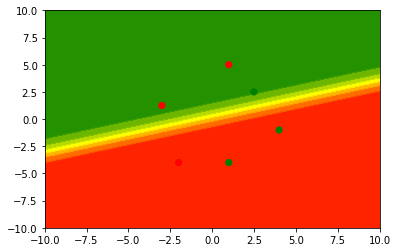

In [35]:
for i in range(20):
    print(sn.w, sn.b)
    plot_sn(X,Y,sn)
    sn.fit(X,Y,1,0.1, False)

To handle the problem of plots overriding we use sub-plots. Below ax is used as subplot.

In [36]:
def plot_sn(X,Y, sn, ax):
    X1 = np.linspace(-10,10,100) # Creating linspace of X with X1 AND X2.
    X2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1, X2)  #Creating a mesh of X1 and X2.
    YY = np.zeros(XX1.shape) #Now, we create a YY array of the same shape as that of XX1 to store the results of the mesh.

    for i in range(X2.size):
        for j in range(X1.size):
            val = np.asarray([X2[i], X1[j]]) #Creating a value array to be passed to sigmoid function to calculate the output.
            YY[i,j] = sn.sigmoid(sn.perceptron(val)) # Value of the perceptron is passed to the sigmoid function.
    ax.contourf(XX1,XX2,YY, cmap = my_cmap, alpha = 0.6)  
    ax.scatter(X[:,0] , X[:,1], c= Y, cmap= my_cmap) #Now the first column of X is scattered on one axis and second column of X in another.
    ax.plot

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



[[ 1.68638217 -1.24047077]] [-0.16208056]



[[ 2.26290174 -0.27356118]] [-0.29621323]



[[ 2.13080766 -1.09603148]] [-0.45006062]



[[ 2.40161686 -0.64101317]] [-0.53331472]



[[ 2.39495703 -0.84126829]] [-0.59201257]



[[ 2.45693015 -0.81078927]] [-0.63174966]



[[ 2.49840449 -0.82905409]] [-0.66978899]



[[ 2.53930399 -0.84179033]] [-0.70525008]



[[ 2.57809591 -0.85413322]] [-0.73858785]



[[ 2.61506199 -0.8658953 ]] [-0.77001996]



[[ 2.65036955 -0.87713041]] [-0.79973994]



[[ 2.68416388 -0.88788488]] [-0.82791422]



[[ 2.71657183 -0.89819917]] [-0.85468679]



[[ 2.74770482 -0.90810875]] [-0.88018302]



[[ 2.77766126 -0.91764498]] [-0.90451267]



[[ 2.80652849 -0.92683566]] [-0.92777233]



[[ 2.8343844  -0.93570558]] [-0.9500474]



[[ 2.86129874 -0.94427692]] [-0.97141373]



[[ 2.88733422 -0.95256963]] [-0.99193895]



[[ 2.91254744 -0.96060168]] [-1.01168362]



[[ 2.93698967 -0.96838938]] [-1.03070216]



[[ 2.96070746 -0.97594751]] [-1.04904362]



[[ 2.98374326 -0.98328955]] [-1.06675238]



[[ 3.00613585 -0.9904278 ]] [-1.08386868]



[[ 3.02792078 -0.99737354]] [-1.10042916]



[[ 3.04913067 -1.00413713]] [-1.11646722]



[[ 3.06979562 -1.0107281 ]] [-1.13201341]



[[ 3.08994335 -1.01715526]] [-1.14709576]



[[ 3.10959954 -1.02342672]] [-1.16173999]



[[ 3.12878797 -1.02955004]] [-1.17596982]


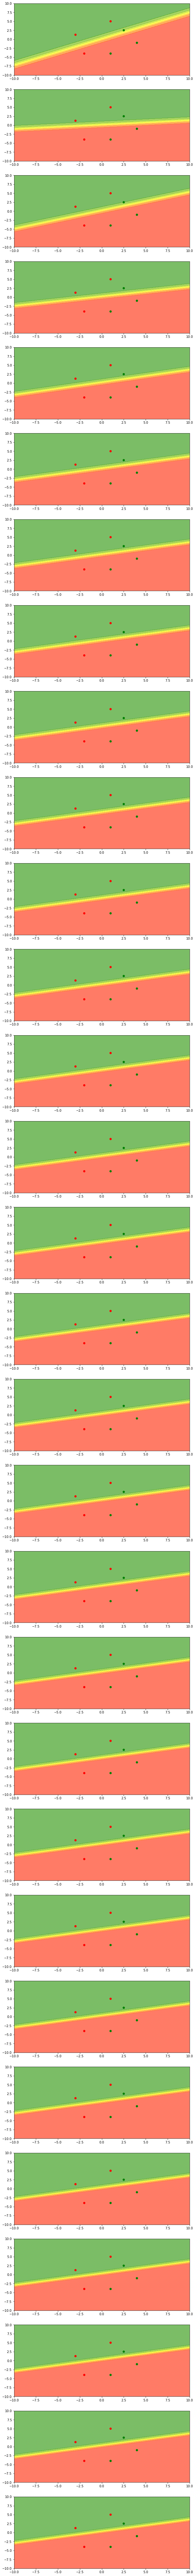

In [37]:
sn.fit(X,Y,1,0.25, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
    print(sn.w, sn.b)
    ax = plt.subplot(N,1, i+1) #Divides plot into no of rows, columns and index which we are plotting currently. 
                               #Here index number should be greater than 0
    plot_sn(X,Y,sn,ax)
    sn.fit(X,Y,1,0.25, False)

#Load Data

In [38]:
#!wget https://drive.google.com/file/d/1rtwC_k4WA8TuGmV4hhSPDp5S4meIXBNV/view

In [46]:
!ls

mobile_cleaned.csv  sample_data


In [47]:
data = pd.read_csv('mobile_cleaned.csv')

In [48]:
data.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


In [49]:
data.shape

(341, 88)

In [50]:
X = data.drop('Rating', axis = 1)
Y = data['Rating'].values #convert to numpy array

In [51]:
X.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Lyf,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [52]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [53]:
threshold = 4
data['Class'] = data['Rating']>= threshold

In [54]:
data['Class']

0       True
1       True
2       True
3       True
4       True
       ...  
336    False
337    False
338     True
339    False
340     True
Name: Class, Length: 341, dtype: bool

In [55]:
threshold = 4.2
data['Class'] = (data['Rating']>= threshold).astype(np.int) #Converts True to 1 and False to 0
data['Class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: Class, Length: 341, dtype: int64

In [56]:
data['Class'].value_counts(normalize=True) #to count no of 1s and 0s and display in percentage(normalize)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [57]:
Y_binarized = data['Class'].values

##Standardization

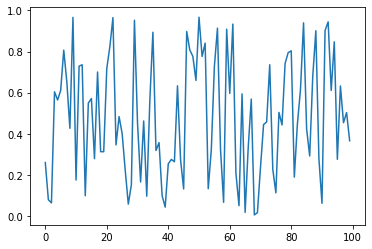

In [58]:
R = np.random.random([100,1])
plt.plot(R)
plt.show()

In [59]:
np.mean(R)

0.48216462119188797

In [60]:
np.std(R)

0.28776655505660004

In [61]:
scaler = StandardScaler()

In [62]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [63]:
scaler.mean_

array([0.48216462])

In [64]:
RT = scaler.transform(R)

In [65]:
np.mean(RT)

1.559863349598345e-16

In [66]:
np.std(RT)

1.0

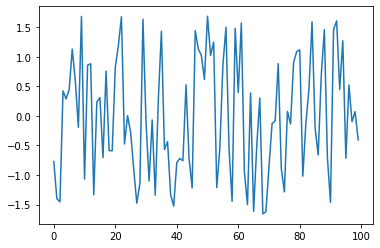

In [67]:
plt.plot(RT)
plt.show()

Split the dataset first and then do the standardization

In [68]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, random_state= 1, stratify = Y_binarized) 
#stratify is used to split the data based on classes of Y. Since Y is real valued we give Y_binarized to split based on classes.

In [69]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [70]:
scaler = StandardScaler()

In [71]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

To standardize Y, such that all mins are 0 and maxs are 1 and the number between will follow the sigmoid function curve, we use MinMaxScaler.

In [72]:
minmaxscaler = MinMaxScaler()

In [73]:
Y_scaled_train = minmaxscaler.fit_transform(Y_train.reshape(-1,1)) #We reshape the Y_train since it contains only 1 feature.

In [74]:
np.max(Y_scaled_train)

1.0

In [75]:
Y_scaled_test = minmaxscaler.transform(Y_test.reshape(-1,1))

In [76]:
scaled_threshold = minmaxscaler.transform(np.array([threshold]).reshape(-1,1)) 
#Since threshold is a single value it should be converted to array and then reshaped

In [77]:
scaled_threshold

array([[0.68]])

In [78]:
Y_binarized_train = (Y_scaled_train > scaled_threshold).astype("int").ravel() #Ravel is used to view the array correctly

In [79]:
Y_binarized_train

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [80]:
Y_binarized_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

#Training on Real Data

In [81]:
sn = SigmoidNeuron()

When the Loss plot does not saturate increase the Epochs, but when it saturates decrease the learning rate further for the model to learn more. Use TQDM to see the progress bar when running the model.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


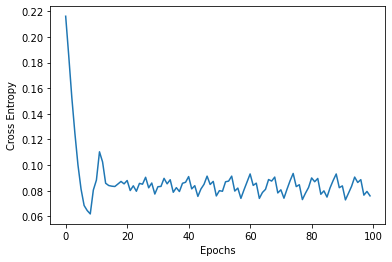

In [82]:
sn.fit(X_scaled_train, Y_scaled_train, epochs = 100, learning_rate= 0.01, display_loss= True)

In [83]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [84]:
Y_pred_binarized_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarized_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [85]:
accuracy_train = accuracy_score(Y_pred_binarized_train, Y_binarized_train)
accuracy_test = accuracy_score(Y_pred_binarized_test, Y_binarized_test)

In [86]:
print(accuracy_train)
print(accuracy_test)

0.43137254901960786
0.45348837209302323


Exercises :
Do plots on different datasets.
Try different thresholds.
Try different hyperparameters.
Create a table between hyperparameters, mse and accuracy.

